Nama: Divia Shinta Sukarsaatmadja

NIM : 24060121140104

Lab : ML A1

##Deskripsi Dataset

Pada tugas praktikum *machine learning* pertemuan 1 ini, saya memilih dataset "Adult/Cencus Income" yang bersumber dari UC Irvine Machine Learning Repository.

Dataset ini merupakan hasil ekstraksi yang dilakukan oleh Barry Becker dari database Sensus 1994. Satu set catatan yang cukup bersih diekstraksi menggunakan kondisi berikut: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). Dataset ini digunakan untuk membuat prediksi apakah seseorang menghasilkan pendapatan melebihi $50K/tahun berdasarkan data sensus.

Informasi detail mengenai dataset ini dapat diakses melalui [tautan berikut.](https://archive.ics.uci.edu/dataset/2/adult)


##Memuat Dataset

In [2]:
# Mengimport pustaka pandas dengan alias 'pd', yang memungkinkan penggunaan fungsi-fungsi pandas.
import pandas as pd

# Variabel url diinisialisasi dengan URL dari dataset yang akan dibaca.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Variabel names diisi dengan daftar nama kolom yang sesuai dengan deskripsi dataset yang akan digunakan saat membaca dataset.
# Ini berguna untuk memberi label pada kolom-kolom di dataset.
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Fungsi pd.read_csv() digunakan untuk membaca dataset dari URL yang diberikan.
# Parameter names=names digunakan untuk menyertakan daftar nama kolom yang diberikan sebelumnya untuk memastikan kolom-kolom dataset
# diidentifikasi dengan benar.
dataset = pd.read_csv(url, names=names)

# Menampilkan lima baris pertama dari dataset yang telah dibaca menggunakan metode head() untuk memastikan bahwa data telah terbaca dengan benar.
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##Melakukan Summary Dataset

###Menentukan Dimensi dari Dataset

In [3]:
# Mengetahui jumlah baris dan kolom dari dataset yang telah dibaca.
dataset.shape

(32561, 15)

###Melihat Isi Dataset

In [4]:
# Melihat semua baris data dari dataset.
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# Melihat 25 baris pertama dari dataset yang telah dibaca.
dataset.head(25)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
# Melihat 25 baris terakhir dari dataset yang telah dibaca.
dataset.tail(25)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32536,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32537,30,Private,345898,HS-grad,9,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,46,United-States,<=50K
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,45,State-gov,252208,HS-grad,9,Separated,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32542,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32543,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K


###Distribusi Kelas Data

In [7]:
# Mengelompokkan data dalam dataset berdasarkan kolom 'income' dan menunjukkan jumlah baris atau ukuran dari setiap kelompok yang dihasilkan.
dataset.groupby('income').size()

income
 <=50K    24720
 >50K      7841
dtype: int64

###Ringkasan Statistik

In [8]:
# Memberikan ringkasan statistik deskriptif dari kolom-kolom numerik dalam dataset.
# Ini termasuk informasi mengenai count (jumlah data non-null), mean (rata-rata), standard deviation (standar deviasi), nilai minimum, nilai maksimum, serta kuartil dari data.
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Menampilkan informasi yang lebih detail tentang dataset, termasuk jumlah non-null (jumlah data yang tidak bernilai null) dan tipe data dari setiap kolom.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


###Visualisasi Data Menggunakan Plot Univariat

<Figure size 1500x1000 with 0 Axes>

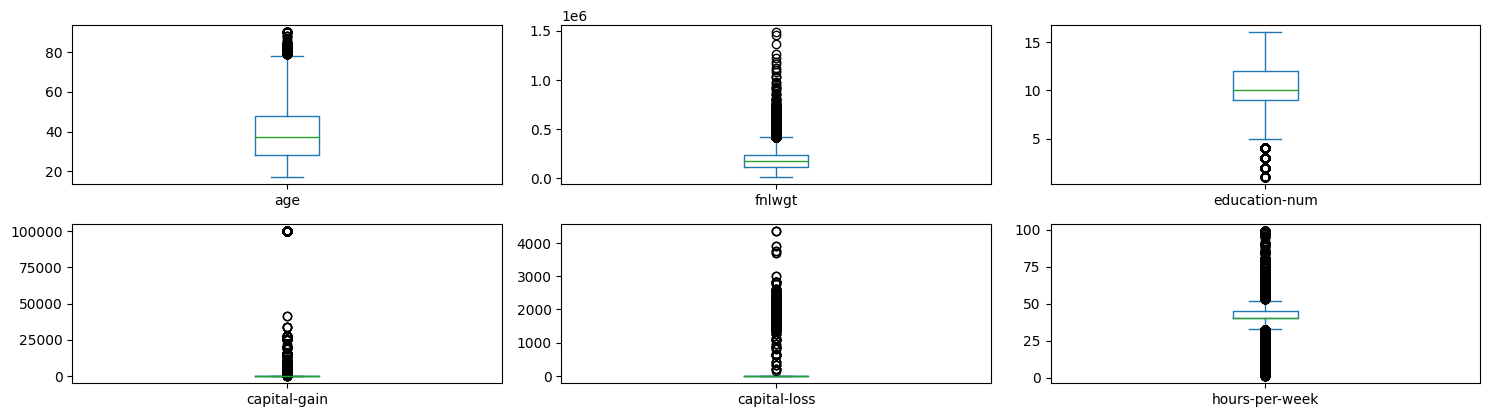

In [10]:
# Mengimport perpustakaan matplotlib untuk visualisasi data.
import matplotlib.pyplot as plt

# Mendefinisikan ukuran total gambar yang akan menampung visualisasi box plot. Ini akan membuat gambar berukuran 15x10 inch.
plt.figure(figsize=(15, 10))

# Membuat box plot untuk setiap kolom dalam dataset dengan menggunakan metode plot dari pandas.
# kind='box' menandakan bahwa visualisasi yang diinginkan adalah box plot.
# subplots=True digunakan untuk membuat subplot terpisah untuk setiap kolom.
# layout=(5, 3) mencoba mengatur box plot dalam grid dengan ukuran 5 baris dan 3 kolom.
# figsize=(15, 10) menandakan ukuran gambar.
dataset.plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 10))

# Membuat visualisasi agar terlihat lebih rapi di dalam gambar.
plt.tight_layout()

# Menampilkan visualisasi yang telah dibuat.
plt.show()

Keterangan:

Dalam analisis statistik, nilai-nilai yang berada jauh dari sebagian besar data disebut sebagai outliers. Outliers bisa memberikan wawasan penting tentang sifat data dan potensi anomali atau ketidaknormalan dalam distribusi data.

1. Box plot kolom age
- Q1 (Kuartil Pertama): Nilai ini adalah median dari setengah data bagian bawah dan dalam hal ini adalah 28. Ini berarti bahwa 25% dari populasi berusia kurang dari atau sama dengan 28 tahun.
- Q2 (Kuartil Kedua atau Median): Nilai ini adalah nilai tengah dataset dan dalam hal ini adalah 37. Ini berarti bahwa 50% dari populasi berusia kurang dari atau sama dengan 37 tahun.
- Q3 (Kuartil Ketiga): Nilai ini adalah median dari setengah data bagian atas dan dalam hal ini adalah 48. Ini berarti bahwa 75% dari populasi berusia kurang dari atau sama dengan 48 tahun.
- Terdapat outliers dengan nilai lebih dari 80. Outliers adalah nilai yang jauh dari sebagian besar data. Dalam konteks ini, outliers menunjukkan bahwa ada individu dalam data yang berusia lebih dari 80 tahun, yang jauh lebih tua dibandingkan sebagian besar populasi.

2. Box plot kolom fnlwgt
- Q1 (Kuartil Pertama): Nilai ini adalah median dari setengah data bagian bawah dan dalam hal ini adalah 1.178270e+05. Ini berarti bahwa 25% dari populasi memiliki nilai ‘fnlwgt’ kurang dari atau sama dengan 1.178270e+05.
- Q2 (Kuartil Kedua atau Median): Nilai ini adalah nilai tengah dataset dan dalam hal ini adalah 1.783560e+05. Ini berarti bahwa 50% dari populasi memiliki nilai ‘fnlwgt’ kurang dari atau sama dengan 1.783560e+05.
- Q3 (Kuartil Ketiga): Nilai ini adalah median dari setengah data bagian atas dan dalam hal ini adalah 2.370510e+05. Ini berarti bahwa 75% dari populasi memiliki nilai ‘fnlwgt’ kurang dari atau sama dengan 2.370510e+05.
- Terdapat outliers dengan nilai lebih dari 0.5. Outliers adalah nilai yang jauh dari sebagian besar data. Dalam konteks ini, outliers menunjukkan bahwa ada individu dalam data dengan nilai ‘fnlwgt’ lebih dari 0.5, yang jauh lebih kecil dibandingkan sebagian besar populasi.

3. Box plot kolom education-num
- Q1 (Kuartil Pertama): Nilai ini adalah median dari setengah data bagian bawah dan dalam hal ini adalah 9. Ini berarti bahwa 25% dari populasi memiliki nilai ‘education-num’ kurang dari atau sama dengan 9.
- Q2 (Kuartil Kedua atau Median): Nilai ini adalah nilai tengah dataset dan dalam hal ini adalah 10. Ini berarti bahwa 50% dari populasi memiliki nilai ‘education-num’ kurang dari atau sama dengan 10.
- Q3 (Kuartil Ketiga): Nilai ini adalah median dari setengah data bagian atas dan dalam hal ini adalah 12. Ini berarti bahwa 75% dari populasi memiliki nilai ‘education-num’ kurang dari atau sama dengan 12.
- Terdapat outliers dengan nilai kurang dari 5. Outliers adalah nilai yang jauh dari sebagian besar data. Dalam konteks ini, outliers menunjukkan bahwa ada individu dalam data dengan nilai ‘education-num’ kurang dari 5, yang jauh lebih rendah dibandingkan sebagian besar populasi.

4. Box plot kolom capital-gain
- Q1 (Kuartil Pertama): Nilai ini adalah median dari setengah data bagian bawah dan dalam hal ini adalah 0. Ini berarti bahwa 25% dari populasi memiliki nilai ‘capital-gain’ kurang dari atau sama dengan 0.
- Q2 (Kuartil Kedua atau Median): Nilai ini adalah nilai tengah dataset dan dalam hal ini adalah 0. Ini berarti bahwa 50% dari populasi memiliki nilai ‘capital-gain’ kurang dari atau sama dengan 0.
- Q3 (Kuartil Ketiga): Nilai ini adalah median dari setengah data bagian atas dan dalam hal ini adalah 0. Ini berarti bahwa 75% dari populasi memiliki nilai ‘capital-gain’ kurang dari atau sama dengan 0.
- Terdapat outliers dengan nilai lebih dari 0. Outliers adalah nilai yang jauh dari sebagian besar data. Dalam konteks ini, outliers menunjukkan bahwa ada individu dalam data dengan nilai ‘capital-gain’ lebih dari 0, yang jauh lebih tinggi dibandingkan sebagian besar populasi.

5. Box plot kolom capital-loss
- Q1 (Kuartil Pertama): Nilai ini adalah median dari setengah data bagian bawah dan dalam hal ini adalah 0. Ini berarti bahwa 25% dari populasi memiliki nilai ‘capital-loss’ kurang dari atau sama dengan 0.
- Q2 (Kuartil Kedua atau Median): Nilai ini adalah nilai tengah dataset dan dalam hal ini adalah 0. Ini berarti bahwa 50% dari populasi memiliki nilai ‘capital-loss’ kurang dari atau sama dengan 0.
- Q3 (Kuartil Ketiga): Nilai ini adalah median dari setengah data bagian atas dan dalam hal ini adalah 0. Ini berarti bahwa 75% dari populasi memiliki nilai ‘capital-loss’ kurang dari atau sama dengan 0.
- Terdapat outliers dengan nilai lebih dari 0.5. Outliers adalah nilai yang jauh dari sebagian besar data. Dalam konteks ini, outliers menunjukkan bahwa ada individu dalam data dengan nilai ‘capital-loss’ lebih dari 0.5, yang jauh lebih tinggi dibandingkan sebagian besar populasi.

6. Box plot kolom hours-per-week
- Q1 (Kuartil Pertama): Nilai ini adalah median dari setengah data bagian bawah dan dalam hal ini adalah 40. Ini berarti bahwa 25% dari populasi memiliki nilai ‘hours-per-week’ kurang dari atau sama dengan 40.
- Q2 (Kuartil Kedua atau Median): Nilai ini adalah nilai tengah dataset dan dalam hal ini adalah 40. Ini berarti bahwa 50% dari populasi memiliki nilai ‘hours-per-week’ kurang dari atau sama dengan 40.
- Q3 (Kuartil Ketiga): Nilai ini adalah median dari setengah data bagian atas dan dalam hal ini adalah 45. Ini berarti bahwa 75% dari populasi memiliki nilai ‘hours-per-week’ kurang dari atau sama dengan 45.
- Terdapat outliers dengan nilai lebih dari 50 dan kurang dari 30. Outliers adalah nilai yang jauh dari sebagian besar data. Dalam konteks ini, outliers menunjukkan bahwa ada individu dalam data dengan nilai ‘hours-per-week’ lebih dari 50 atau kurang dari 30, yang jauh lebih tinggi atau lebih rendah dibandingkan sebagian besar populasi.




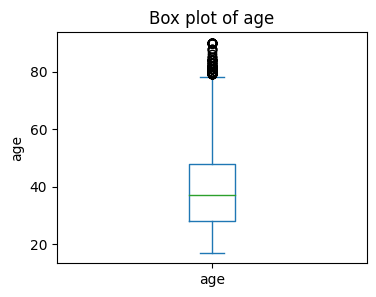

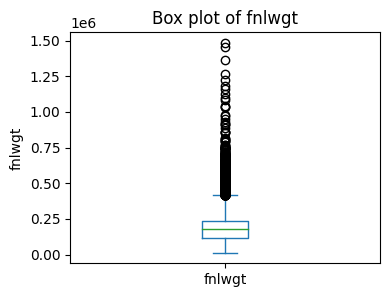

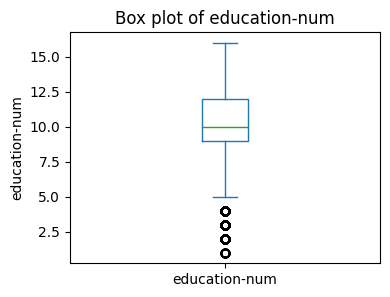

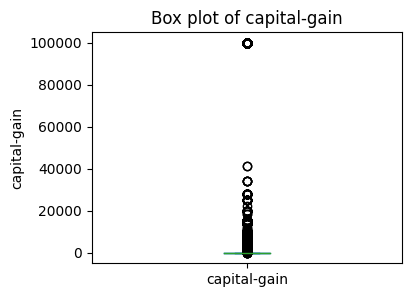

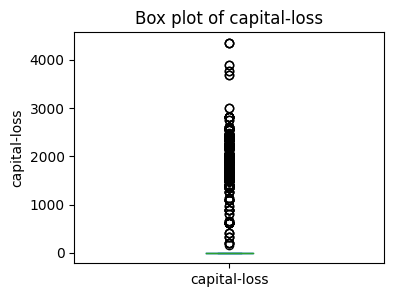

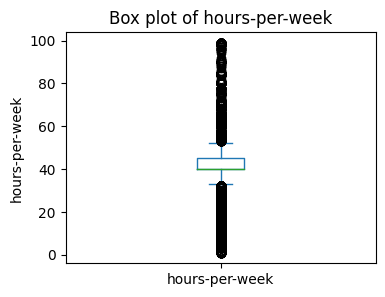

In [13]:
# Mengimport perpustakaan matplotlib untuk visualisasi data.
import matplotlib.pyplot as plt

# Mendefinisikan sebuah list yang berisi nama-nama variabel numerik yang akan divisualisasikan sebagai box plot.
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Melakukan iterasi pada setiap kolom yang ada di dalam list numeric_columns.
for column in numeric_columns:
    # Membuat gambar (figure) untuk menampung box plot dengan ukuran 4x3 inch.
    plt.figure(figsize=(4, 3))
    # Menggunakan fungsi plot dari pandas untuk membuat box plot dari kolom yang sedang diiterasi.
    dataset[column].plot(kind='box')
    # Menambahkan judul pada box plot yang menunjukkan kolom yang sedang divisualisasikan.
    plt.title(f'Box plot of {column}')
    # Menunjukkan label sumbu Y yang menyatakan nama kolom yang sedang divisualisasikan.
    plt.ylabel(column)
    # Menampilkan box plot yang telah dibuat.
    plt.show()


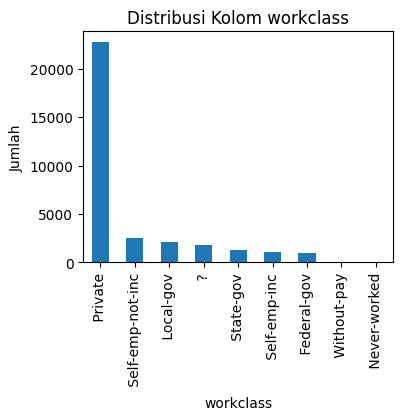

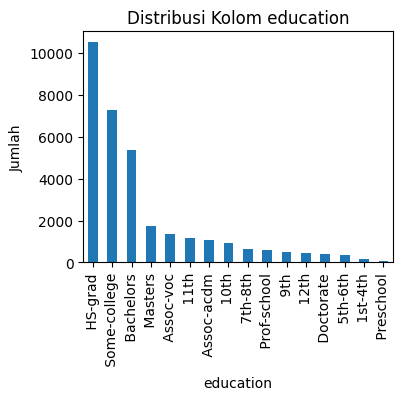

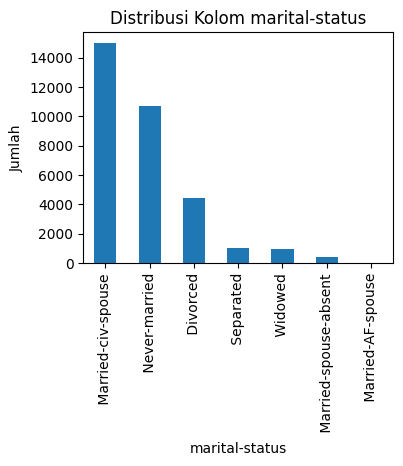

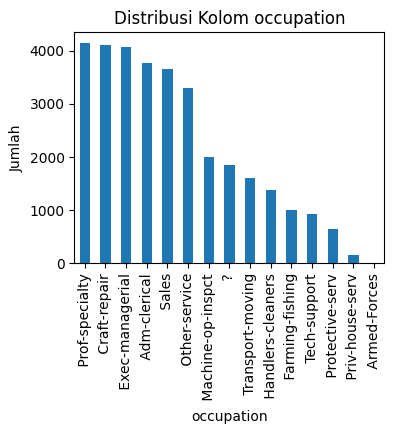

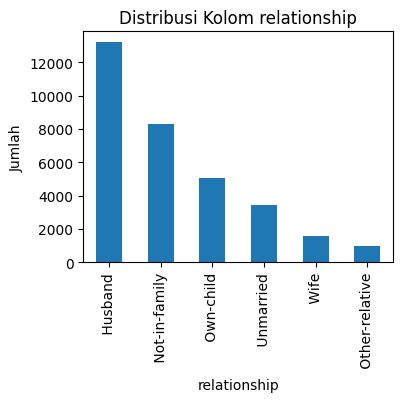

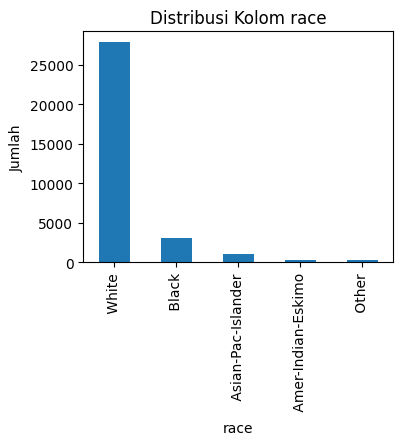

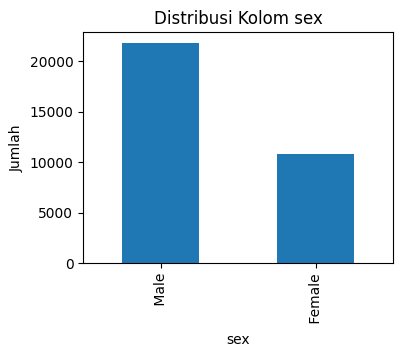

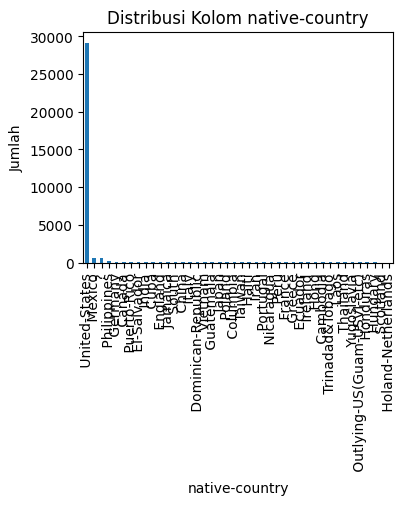

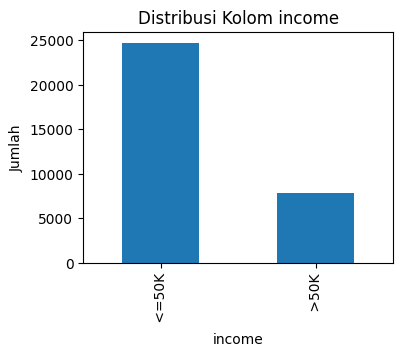

In [14]:
# Melakukan impor perpustakaan matplotlib untuk melakukan visualisasi data.
import matplotlib.pyplot as plt

# Melakukan iterasi pada setiap kolom dalam dataset yang bertipe data objek (tipe 'object').
for column in dataset.select_dtypes(include=['object']).columns:
    # Membuat gambar (figure) untuk menampung visualisasi bar plot dengan ukuran 4x3 inch.
    plt.figure(figsize=(4, 3))
    # Menggunakan fungsi value_counts() untuk menghitung jumlah kemunculan setiap nilai unik dalam kolom tersebut, dan kemudian membuat bar plot dari nilai-nilai unik tersebut.
    dataset[column].value_counts().plot(kind='bar')
    # Menambahkan judul pada bar plot yang menunjukkan kolom yang sedang divisualisasikan.
    plt.title(f'Distribusi Kolom {column}')
    # Menunjukkan label sumbu X yang menyatakan nama kolom yang sedang divisualisasikan.
    plt.xlabel(column)
    # Menunjukkan label sumbu Y yang menyatakan jumlah kemunculan nilai unik dari kolom tersebut.
    plt.ylabel('Jumlah')
    # Menampilkan bar plot yang telah dibuat.
    plt.show()


Keterangan:

Bar plot adalah alat visualisasi data yang memberikan gambaran tentang frekuensi atau jumlah data dalam setiap kategori.

1. Bar plot kolom workclass
- Private: Kategori ini memiliki jumlah terbanyak. Ini berarti bahwa sebagian besar individu dalam data bekerja di sektor swasta.
- Self-emp-not-inc: Kategori ini memiliki jumlah kedua terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang memiliki pekerjaan sendiri tetapi tidak tergabung dalam perusahaan atau entitas hukum lainnya.
- Local-gov: Kategori ini memiliki jumlah ketiga terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang bekerja untuk pemerintah lokal.

2. Bar plot kolom education
- HS-grad: Kategori ini memiliki jumlah terbanyak. Ini berarti bahwa sebagian besar individu dalam data memiliki tingkat pendidikan lulusan sekolah menengah atas.
- Some-college: Kategori ini memiliki jumlah kedua terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang memiliki beberapa pengalaman kuliah, tetapi mungkin belum mendapatkan gelar.
- Bachelors: Kategori ini memiliki jumlah ketiga terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang memiliki gelar sarjana.

3. Bar plot kolom marital-status
- Married-civ-spouse: Kategori ini memiliki jumlah terbanyak. Ini berarti bahwa sebagian besar individu dalam data berstatus menikah dengan pasangan sipil.
- Never-married: Kategori ini memiliki jumlah kedua terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang belum pernah menikah.
- Divorced: Kategori ini memiliki jumlah ketiga terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang bercerai.

4. Bar plot kolom occupation
- Prof-specialty: Kategori ini memiliki jumlah terbanyak. Ini berarti bahwa sebagian besar individu dalam data bekerja dalam profesi khusus.
- Craft-repair: Kategori ini memiliki jumlah kedua terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang bekerja dalam bidang kerajinan atau perbaikan.
- Exec-managerial: Kategori ini memiliki jumlah ketiga terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang bekerja dalam posisi eksekutif atau manajerial.

5. Bar plot kolom relationship
- Husband: Kategori ini memiliki jumlah terbanyak. Ini berarti bahwa sebagian besar individu dalam data memiliki peran sebagai suami dalam hubungan keluarga mereka.
- Not-in-family: Kategori ini memiliki jumlah kedua terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang tidak termasuk dalam keluarga inti (misalnya, mereka mungkin adalah kerabat jauh, teman, atau orang yang tinggal sendiri).
- Own-child: Kategori ini memiliki jumlah ketiga terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang merupakan anak dari orang tua mereka.

6. Bar plot kolom race
- White: Kategori ini memiliki jumlah terbanyak. Ini berarti bahwa sebagian besar individu dalam data beridentitas sebagai orang kulit putih.
- Black: Kategori ini memiliki jumlah kedua terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang beridentitas sebagai orang kulit hitam.
- Asian-Pac-Islander: Kategori ini memiliki jumlah ketiga terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang beridentitas sebagai orang Asia atau Kepulauan Pasifik.

7. Bar plot kolom sex
- Male: Kategori ini memiliki jumlah terbanyak. Ini berarti bahwa sebagian besar individu dalam data berjenis kelamin laki-laki.
- Female: Kategori ini memiliki jumlah kedua terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang berjenis kelamin perempuan.

8. Bar plot kolom native-country
- United States: Kategori ini memiliki jumlah terbanyak. Ini berarti bahwa sebagian besar individu dalam data berasal dari Amerika Serikat.
- Mexico: Kategori ini memiliki jumlah kedua terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang berasal dari Meksiko.
- Philippines: Kategori ini memiliki jumlah ketiga terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang berasal dari Filipina.

9. Bar plot kolom income
- (<=50K): Kategori ini memiliki jumlah terbanyak. Ini berarti bahwa sebagian besar individu dalam data memiliki pendapatan kurang dari atau sama dengan 50K.
- (<50K): Kategori ini memiliki jumlah kedua terbanyak. Ini berarti bahwa ada sejumlah individu dalam data yang memiliki pendapatan lebih dari 50K.

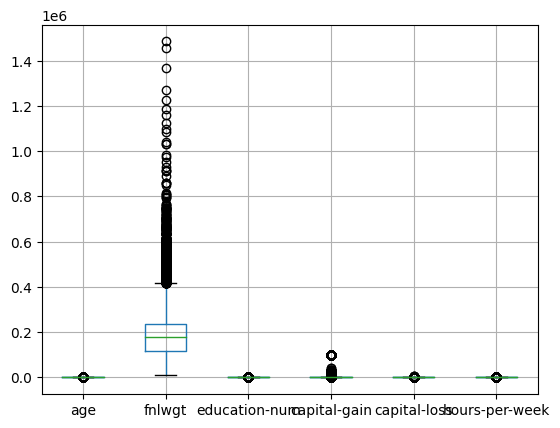

In [15]:
# Membuat box plot untuk setiap kolom dalam dataset menggunakan metode boxplot() dari pandas.
dataset.boxplot()
# Menampilkan visualisasi yang telah dibuat menggunakan boxplot().
plt.show()

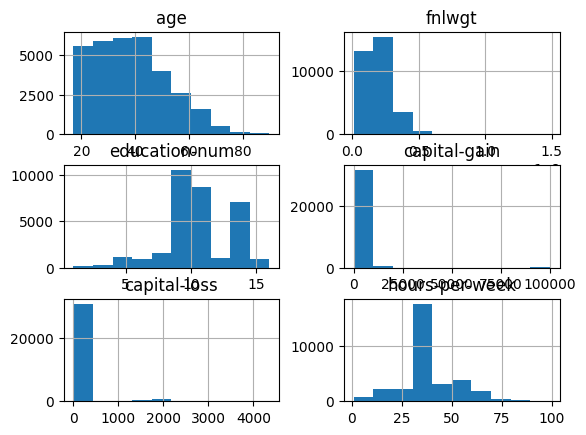

In [16]:
# Membuat histogram dari setiap kolom dalam dataset menggunakan perpustakaan pandas.
dataset.hist()
# Menampilkan semua histogram yang dihasilkan menggunakan perpustakaan matplotlib.
plt.show()

###Visualisasi Data Menggunakan Plot Multivariat

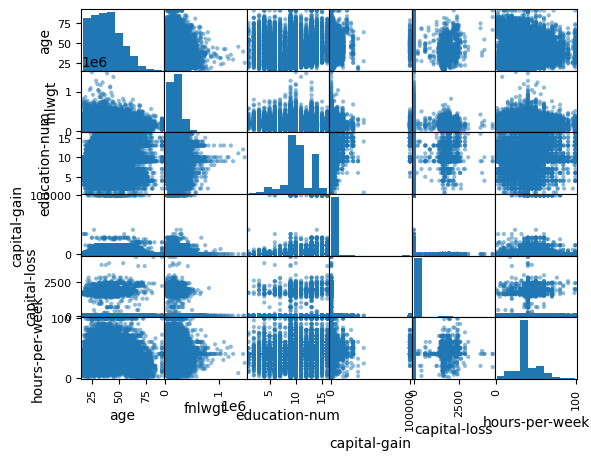

In [17]:
# Mengimpor perpustakaan pandas, yang digunakan untuk manipulasi data dan analisis.
import pandas
# Mengimpor fungsi scatter_matrix yang memungkinkan pembuatan matriks scatter plot untuk dataset.
from pandas.plotting import scatter_matrix
# Memanggil fungsi scatter_matrix dan memberikan dataset dataset sebagai parameter.
scatter_matrix(dataset)
# Menampilkan matriks scatter plot yang dihasilkan.
plt.show()

Keterangan:

Plot multivariat diatas menunjukkan scatter plot untuk setiap pasangan variabel numerik dalam dataset.Setiap sel dari matriks menunjukkan hubungan antara dua variabel numerik yang berbeda, misalnya bagaimana 'age' berhubungan dengan 'education-num' atau 'capital-gain' berhubungan dengan 'hours-per-week'. Diagonal utama dari matriks menunjukkan histogram dari setiap variabel numerik. Untuk setiap sel di luar diagonal utama, terdapat scatter plot yang menunjukkan sebaran titik data antara dua variabel yang berbeda. Dapat terlihat pola sebaran data, kecenderungan, dan korelasi antara variabel dalam bentuk plot titik.

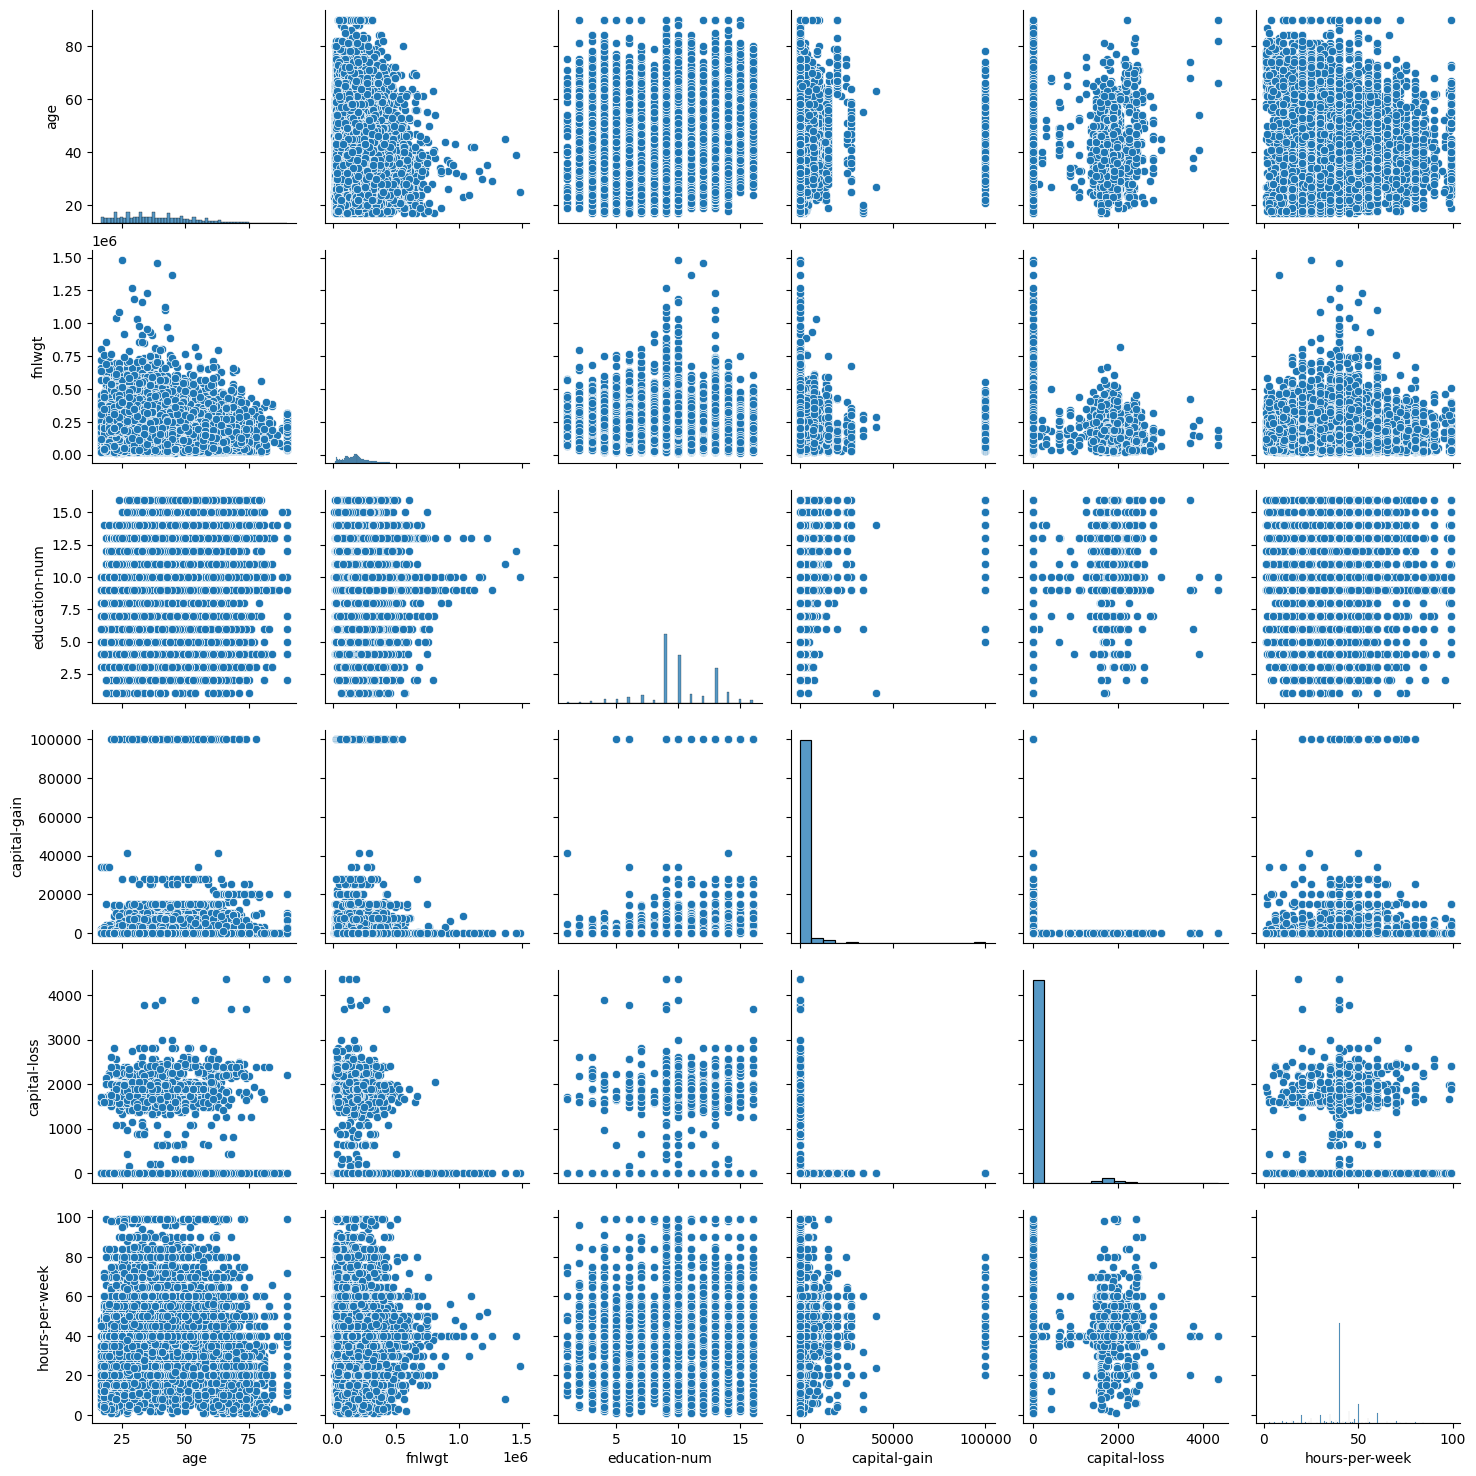

In [18]:
# Mengimport perpustakaan Seaborn, yang sering digunakan untuk visualisasi data statistik di Python.
import seaborn as sns
# Membuat plot yang menampilkan hubungan antara setiap pasangan variabel numerik dalam dataset.
sns.pairplot(dataset)

Keterangan:

Pairplot menampilkan scatter plot untuk setiap pasangan variabel numerik dalam dataset. Diagonal utama dari matriks menampilkan histogram dari setiap variabel numerik. Setiap sel di luar diagonal utama menunjukkan scatter plot antara dua variabel yang berbeda. Scatter plot menunjukkan hubungan atau korelasi antara pasangan variabel numerik. Misalnya, bagaimana 'age' berkorelasi dengan 'education-num' atau 'capital-gain' berkorelasi dengan 'hours-per-week'. Selain scatter plot, histogram pada diagonal utama menunjukkan distribusi dari setiap variabel numerik. Dapat terlihat pola sebaran data, kecenderungan, dan korelasi antara variabel dalam bentuk scatter plot, yang bermanfaat dalam pemahaman data.